# Pandas

In [1]:
from IPython.display import display, HTML, YouTubeVideo
import pandas as pd
import numpy as np

# have plots render in notebook
%matplotlib inline 

Pandas!


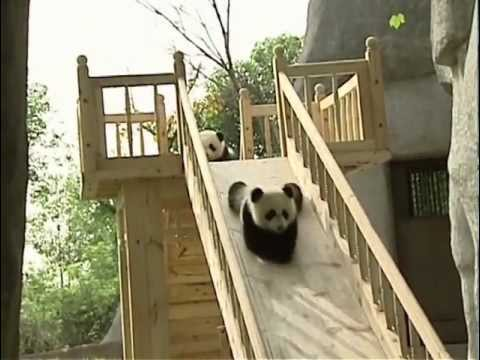

In [2]:
print('Pandas!')
YouTubeVideo('sGF6bOi1NfA')

## Introduction

Pandas is a package that builds on the NumPy array structure by introducing ``DataFrame``s, which are essentially multidimensional arrays with attached row and column labels. 
Pandas is the tool of choice for the sort of "data munging" tasks that occupy much of a data scientist's time.
In this (short!) introduction to pandas we will introduce the basic functionalities of pandas which you will find useful on a day to day basis as a data scientist. 

## Pandas objects

Panda's has three fundamental data structures: the ``Series``, ``DataFrame``, and ``Index``.

### Series

A Pandas ``Series`` is a one-dimensional array of indexed data.
One way to create a series is as follows:

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [4]:
data.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

In [5]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Accesing the data using integer indexing:

In [6]:
data.iloc[1]

0.5

In [7]:
data.iloc[1:3]

b    0.50
c    0.75
dtype: float64

Or using the index:

In [8]:
data.loc['b']

0.5

In [9]:
data.loc['b':'c']

b    0.50
c    0.75
dtype: float64

A series can also be created from a dictionary. 

In [10]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

### Dataframe

The next fundamental structure in Pandas is the ``DataFrame``. If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.

In [12]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

In [13]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [14]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [15]:
states.columns

Index(['area', 'population'], dtype='object')

The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed:

In [16]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [17]:
states['density'] = states['population'] / states['area']
states

,area,population,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


## Missing data

In the real world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. Pandas uses ``None`` or ``NaN`` (acronym for *Not a Number*) to represent missing data. 

In [18]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [19]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [21]:
data.dropna()

0        1
2    hello
dtype: object

In [22]:
data.fillna(0)

0        1
1        0
2    hello
3        0
dtype: object

## Combining Datasets: Concat and Append

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects

In [23]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [24]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [25]:
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


To combine this information into a single ``DataFrame``, we can use the ``pd.merge()`` function:

In [26]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


# Aggregation and Grouping


In [30]:
rng = np.random.RandomState(42)
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df
#np.random.RandomState?

,A,B
0,0.374540,0.155995
1,0.950714,0.058084
2,0.731994,0.866176
3,0.598658,0.601115
4,0.156019,0.708073


In [32]:
df.mean()

A    0.562385
B    0.477888
dtype: float64

By specifying the ``axis`` argument, you can instead aggregate within each row:

In [33]:
df.sum(axis='columns')

0    0.530535
1    1.008798
2    1.598170
3    1.199773
4    0.864091
dtype: float64

In addition, there is a convenience method describe() that computes several common aggregates for each column and returns the result. 

In [34]:
df.describe()

,A,B
count,5.000000,5.000000
mean,0.562385,0.477888
std,0.308748,0.353125
min,0.156019,0.058084
25%,0.374540,0.155995
50%,0.598658,0.601115
75%,0.731994,0.708073
max,0.950714,0.866176


Groupby breaks up a dataframe depending on the value of a specified key, computes some function within the individual groups (usually an aggregate, transformation, or filtering), and finally merges the results of these into an output array. 

In [35]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [36]:
df.groupby('key')

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object. To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object. 

In [37]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


# Vectorized String Operations

These are very useful when working with real-world (i.e. messy) data. 

In [38]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [39]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

Using tab completion on this ``str`` attribute will list all the vectorized string methods available to Pandas. Or, as always, see the documentation. 

#### The remainder of this notebook is almost entirely challenges:

1. Querying and merging data : Using pandas as an in-memory database.
2. Cleaning and transforming data : Showing off the wonders of pandas.

To find coding chalenges, ctrl+f for a 'Task'

## 1. Querying and merging data
Using pandas as an in-memory database.

#### Task: Read the documentation on [`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). 
There's no getting around this -- knowing the stuff it can do is incredibly useful.

In [40]:
df = pd.read_csv('data/meteors.csv', encoding="ISO-8859-1")

In [41]:
df.head(2)

,place,type_of_meteorite,mass_g,fell_found,year,database,coordinate_1,coordinates_2,cartodb_id,created_at,updated_at,year_date,longitude,latitude,geojson
0,Ur,Iron,0.00,Found,-2500.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,30.9,46.01667,34242,15/02/13 20:56,15/02/13 21:04,NaN,46.01667,30.9,"{""type"":""Point"",""coordinates"":[46.01667,30.9]}"
1,A-881561,H4,836.87,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.0,26.00000,4141,15/02/13 20:56,15/02/13 21:11,01/01/88 00:00,26.00000,-72.0,"{""type"":""Point"",""coordinates"":[26,-72]}"


In [42]:
df.describe()

,mass_g,year,coordinate_1,coordinates_2,cartodb_id,longitude,latitude
count,3.451300e+04,34166.000000,34513.000000,34513.000000,34513.000000,34512.000000,34512.000000
mean,1.686183e+04,1985.247410,-47.006794,69.789807,17257.000000,69.781558,-47.008100
std,6.600311e+05,49.058956,46.880516,81.833069,9963.189257,81.819904,46.880568
min,0.000000e+00,-2500.000000,-87.366670,-165.433330,1.000000,-165.433330,-87.366670
25%,5.100000e+00,1981.000000,-76.843010,26.000000,8629.000000,26.000000,-76.843150
50%,2.419000e+01,1990.000000,-72.000000,54.884170,17257.000000,54.883635,-72.000000
75%,1.706900e+02,2000.000000,18.343670,158.779380,25885.000000,158.778810,18.343990
max,6.000000e+07,2012.000000,81.166670,354.473330,34513.000000,178.200000,81.166670


In [43]:
df[7:10] # show the 7, 8, and 9th rows

,place,type_of_meteorite,mass_g,fell_found,year,database,coordinate_1,coordinates_2,cartodb_id,created_at,updated_at,year_date,longitude,latitude,geojson
7,A-881363,L4,105.42,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.0,26.0,10471,15/02/13 20:56,15/02/13 21:11,01/01/88 00:00,26.0,-72.0,"{""type"":""Point"",""coordinates"":[26,-72]}"
8,A-9034,L6,75.15,Found,1990.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.0,26.0,11885,15/02/13 20:56,15/02/13 21:11,01/01/90 00:00,26.0,-72.0,"{""type"":""Point"",""coordinates"":[26,-72]}"
9,A-881246,H4,57.07,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.0,26.0,13071,15/02/13 20:56,15/02/13 21:11,01/01/88 00:00,26.0,-72.0,"{""type"":""Point"",""coordinates"":[26,-72]}"


In [44]:
df.loc[:5, 'place'] # first five rows of 'place' column

0                 Ur
1           A-881561
2    Wietrzno-Bobrka
3           A-881448
4           A-881813
5           A-881637
Name: place, dtype: object

Index by position rather than name using `iloc`

In [45]:
df.iloc[-3:, :5] # last 3 rows of first 5 colums

,place,type_of_meteorite,mass_g,fell_found,year
34510,À_À_st 063,Relict OC,0.0,Found,2010.0
34511,À_À_st 064,Relict OC,0.0,Found,2011.0
34512,À_À_st 049,Relict OC,0.0,Found,2012.0


In [46]:
# multiple columns
df[['mass_g', 'year']].head()

,mass_g,year
0,0.00,-2500.0
1,836.87,1988.0
2,376.00,-600.0
3,341.27,1988.0
4,296.96,1988.0


In [47]:
# Compute a histogram of the counts and show the first 10 rows
df['type_of_meteorite'].value_counts()[:10]

L6            6565
H5            5620
H4            3322
H6            3230
L5            2732
Stone-uncl    1942
LL5           1896
LL6            961
L4             822
H4/5           378
Name: type_of_meteorite, dtype: int64

In [48]:
# can use sql-like df.colum_name syntax
# but beware - can lead to some unexpected results if the column names
# contain numbers or clash with pandas methods. 
df.fell_found.value_counts()[:5]

Found          33148
Fell            1189
Age <300 Ma        4
Age <70 Ma         4
Age <500 Ma        3
Name: fell_found, dtype: int64

In [49]:
is_after_1999 = df['year'] > 1999 # boolean mask
since_1999 = df[is_after_1999] # select based on values

In [50]:
is_l6 = df['type_of_meteorite'] == "L6" 
df[is_after_1999 & is_l6].head(2)

,place,type_of_meteorite,mass_g,fell_found,year,database,coordinate_1,coordinates_2,cartodb_id,created_at,updated_at,year_date,longitude,latitude,geojson
497,JaH 073,L6,550000.0,Found,2002.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,19.70000,55.73333,73,15/02/13 20:56,15/02/13 21:11,01/01/02 00:00,55.73333,19.70000,"{""type"":""Point"",""coordinates"":[55.73333,19.7]}"
620,Jalu,L6,150000.0,Found,2000.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,27.95833,21.68333,195,15/02/13 20:56,15/02/13 21:11,01/01/00 00:00,21.68333,27.95833,"{""type"":""Point"",""coordinates"":[21.68333,27.958..."


#### Task: Find all meteor impacts over 20000000g after 1900

In [53]:
## your code
mask_mg = df['mass_g']>20000000
mask_y = df['year'] > 1900
df[mask_mg & mask_y]

,place,type_of_meteorite,mass_g,fell_found,year,database,coordinate_1,coordinates_2,cartodb_id,created_at,updated_at,year_date,longitude,latitude,geojson
426,Hoba,"Iron, IVB",60000000.0,Found,1920.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-19.58333,17.91667,1,15/02/13 20:56,15/02/13 21:11,01/01/20 00:00,17.91667,-19.58333,"{""type"":""Point"",""coordinates"":[17.91667,-19.58..."
433,Mundrabilla,"Iron, IAB-ung",24000000.0,Found,1911.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-30.78333,127.55000,8,15/02/13 20:56,15/02/13 21:11,01/01/11 00:00,127.55000,-30.78333,"{""type"":""Point"",""coordinates"":[127.55,-30.78333]}"
434,Sikhote-Alin,"Iron, IIAB",23000000.0,Fell,1947.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,46.16000,134.65333,9,15/02/13 20:56,15/02/13 21:11,01/01/47 00:00,134.65333,46.16000,"{""type"":""Point"",""coordinates"":[134.65333,46.16]}"


#### Task: print out the masses of the heaviest 5 meteors

In [71]:
## your code
df['mass_g'].sort_values()[-5:]

430    28000000.0
429    30000000.0
428    50000000.0
427    58200000.0
426    60000000.0
Name: mass_g, dtype: float64

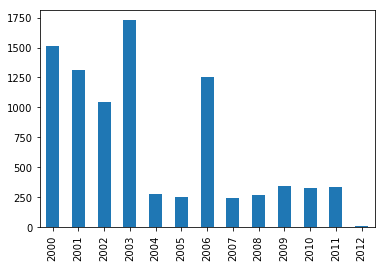

In [73]:
# the power of chaining methods in pandas
(df.loc[(df['year'] > 1999), 'year'].astype(int)
                                    .value_counts()
                                    .sort_index()
                                    .plot('bar'));
df.loc?

#### Task: create a scatter plot showing the mass of the meteors against time (after 1950)

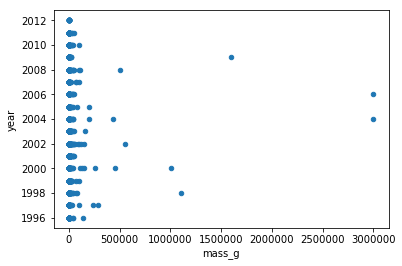

In [76]:
## your code
dfp = df[df['year'] > 1995]
dfp.plot(kind='scatter', x='mass_g', y='year');


#### Task: plot the breakdown of fell vs. found

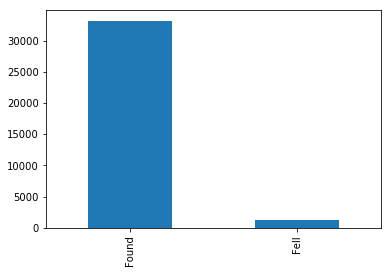

In [88]:
## your code
df['fell_found'].value_counts()[:2].plot('bar')

#### Task: Which years had the biggest average meteors?

In [110]:
## your code
df.groupby('year')['mass_g'].mean().sort_values(ascending = False).head(3)


year
1576.0    50000000.0
1818.0    14556887.5
1600.0    10100000.0
Name: mass_g, dtype: float64

### Task: recreate the data science in this [FiveThrityEight story](https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/)
We provide the data from their github, which you will need to merge, or join, or concatenate (see `pd.merge` especially the `how` keyword argument).
Please only use pandas.

In [111]:
births_94_03 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv')
births_00_14 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv')

In [112]:
display(births_94_03.shape, births_94_03.head(3),
        births_00_14.shape, births_00_14.head(3))

(3652, 5)

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142


(5479, 5)

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363


In [122]:
## your code
df = pd.concat([births_94_03,births_00_14])
#df = pd.merge(births_94_03,births_00_14)
df

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
5,1994,1,6,4,11406
6,1994,1,7,5,11251
7,1994,1,8,6,8653
8,1994,1,9,7,7910
9,1994,1,10,1,10498


In [ ]:
## your code

## 2. Cleaning and transforming data
Showing off the wonders of pandas

We provide a slightly messy datset on vegetarian restaurants on the US.
### Task: Define and answer interesting data science questions using pandas
First, assess and clean the data using the following methods
- `groupby` (as well as `agg` and `unstack`)
- string methods (`df.column_name.str`)
- datetimes (e.g. on the `dateUpdated` column)


_Do not loops over the columns -- always apply transformations vectorwise._

In [2]:
veg = pd.read_csv('data/vegetarian_restaurants_US.csv')

In [3]:
veg.head(2)

,address,categories,city,claimed,country,cuisines,dateOpened,dateUpdated,descriptions,facebookPageURL,...,menuURL,name,paymentTypes,phones,postalCode,priceRange,province,sic,twitter,websites
0,2871 Gulf To Bay Blvd,"American, American (new), Clearwater Restauran...",Clearwater,NaN,US,NaN,NaN,2014-02-01T04:41:06Z,"Tags: American (New), American, and Trendy Sta...",NaN,...,NaN,Village Inn Restaurant and Bakery,NaN,7277964988,33759,NaN,FL,8423,NaN,NaN
1,605 W Main St,Caf and Sandwich Place,Louisville,NaN,US,"Vegetarian, Delicatessen",NaN,2016-07-23T22:37:24Z,"Atlantic No. 5, Louisville: See 4 unbiased rev...",NaN,...,NaN,Atlantic No. 5,Yes,5028833398,40202,USD 25.00-40.00,KY,NaN,NaN,atlanticno5.com


In [5]:
## your code
#df.groupby?
df = veg.groupby(['cuisines'])
df

In [11]:
## your code
veg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18155 entries, 0 to 18154
Data columns (total 29 columns):
address            17201 non-null object
categories         17993 non-null object
city               17534 non-null object
claimed            820 non-null object
country            18155 non-null object
cuisines           10468 non-null object
dateOpened         264 non-null object
dateUpdated        18155 non-null object
descriptions       11224 non-null object
facebookPageURL    1182 non-null object
features           6881 non-null object
hours              7973 non-null object
images             6576 non-null object
isClosed           605 non-null object
key                18155 non-null object
lat                13704 non-null float64
languages          8 non-null object
long               13760 non-null float64
menus              7091 non-null object
menuURL            3456 non-null object
name               17333 non-null object
paymentTypes       6250 non-null object
phon

In [ ]:
## your code

In [ ]:
## your code

In [ ]:
## your code

#### Good practices
- Explicit variable names (not single letter names, not mathematics names).
- Spaces after commas, around operators like =, etc.
- Limit the length of lines (and logic per line) - pandas can tempt you away from this, so be thoughtful 

## Credit

- Adapted from a notebook created by Nick Robinson [Github](https://github.com/nickrobinson251/py-lectures)
- Some of this notebook edits and builds on resoures found in Python Data Science Handbook by Jake VanderPlass. 

In [ ]:
HTML('''
<style>
.pretty {
  color: #00AEF9;
  font: proxima-nova;
  }
</style>

<h1 class="pretty">Good luck!</h1>
''')